In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
# import seaborn as sns
# from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import math

rng = np.random.default_rng(51)


In [2]:
df = pd.read_csv('letter-recognition.data', header=None)


In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
le = preprocessing.LabelEncoder()
for column_name in df.columns:
    df[column_name] = le.fit_transform(df[column_name])
y = df[0]
X = df.loc[:, df.columns != 0]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
X_train =  X_train.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_test = X_test.to_numpy()

In [6]:
from random_forest import RandomForest
from decision_tree import DecisionTree
from random_forest import accuracy

n_trees = np.arange(1,5)
acc_train_rf = []
acc_test_rf = []

for n in n_trees:
    forest = RandomForest(n)
    forest.fit(X_train, y_train)
    a = accuracy(forest, X_train, y_train)
    acc_train_rf.append(a)
    print(f'N {n} acc={a}')
    acc_test_rf.append( accuracy(forest, X_test, y_test))


rf_acc = np.array(acc_train_rf).max()
#print('Decision Tree Accuracy: {:0.3f}'.format(dt_acc))    
print('Random Forest Accuracy: {:0.3f}'.format(rf_acc))

f, ax = plt.subplots(figsize=(5,4), dpi=125)
ax.plot(n_trees, acc_train_rf, label='Training')
#ax.plot(n_trees, acc_test_rf, label='Test')
#ax.plot([1, 26], [dt_acc, dt_acc], label='Decision Tree', ls=':')
ax.set_xlabel('# Trees'); ax.set_ylabel('acc'); ax.legend();

N 1 acc=0.9227142857142857


In [10]:
y_pred = forest.predict(X_test)

In [11]:
y_pred

array([23, 11,  0, ...,  9, 25,  5])

In [13]:
print(y_test)

[19 11  0 ...  9 25  5]


In [ ]:
(y_test)

In [ ]:

from sklearn.metrics import classification_report

with open ('metrics.txt', 'w') as out:
    out.writelines(classification_report(y_pred, y_test))

Random Forest Accuracy: 0.987
Random Forest (sklearn) Accuracy: 0.893


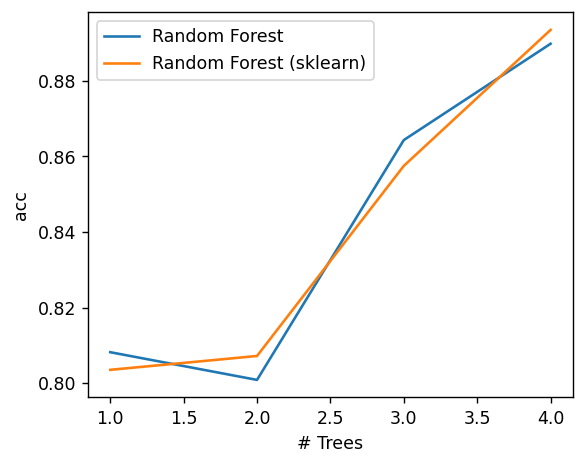

In [18]:
from sklearn.ensemble import RandomForestClassifier

acc_test_sk = []
for n in n_trees:
    forest = RandomForestClassifier(n_estimators=n)
    forest.fit(X_train, y_train)
    acc_test_sk.append(accuracy(forest, X_test, y_test))

print('Random Forest Accuracy: {:0.3f}'.format(rf_acc))
print('Random Forest (sklearn) Accuracy: {:0.3f}'.format(np.array(acc_test_sk).max()))

f, ax = plt.subplots(figsize=(5,4), dpi=125)
ax.plot(n_trees, acc_test_rf, label='Random Forest')
ax.plot(n_trees, acc_test_sk, label='Random Forest (sklearn)')
ax.set_xlabel('# Trees'); ax.set_ylabel('acc'); ax.legend();